In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('Regression Data.csv')

In [3]:
x = df.Marketing
y = df.Profit
m = len(x)

#  MANUALLY ASSUME A0 AND A1 VALUES WHICH SATISFY OUR DATA


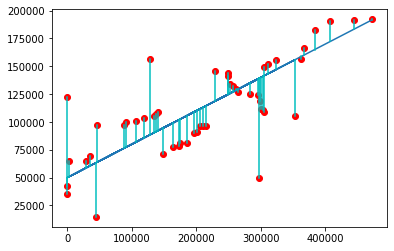

In [4]:
fig , ax = plt.subplots()      
ax.plot(x,y,'o',color='r',label = 'Training Data')  
ax.plot(x, 50000 + 0.30*x , label= 'h(x) = 50000 + 0.30*x') 

for i in range (m):
    ax.plot([x[i] , x[i]] , [50000 + 0.30*x[i] , y[i]] , '-' , color = 'c')
  


# PREDICT A0 AND A1 USING LINEAR REGRESSION FUNCTIONS

In [21]:
# functions for linear regression



In [5]:
def h(x, a0, a1):                             # hypothesis
    h = a0 + a1*x
    return h
def J(a0, a1, x, y, m):                       #cost function
    j = 0
    for i in range (m):
        j += (h(x[i], a0, a1) - y[i]) ** 2
    return j/(2*m)
def gradJ(a0, a1, x, y, m):                    # gradient of cost function
    Dja0 = 0 
    Dja1 = 0
    for i in range (m):
        Dja0 += (h(x[i],a0,a1) - y[i])
        Dja1 += (h(x[i],a0,a1) - y[i]) * x[i]
    gradJ = [Dja0/m, Dja1/m]
    return gradJ
def ap1(a0, a1, gJ, alpha):                    # updating the theta values
    a0p1 = a0 - alpha * gJ[0]
    a1p1 = a1 - alpha * gJ[1]
    ap1 = [a0p1, a1p1]
    return ap1


In [8]:
x_mean = x.mean()
x_std = x.std()

y_mean = y.mean()
y_std = y.std()

x_new = (x - x_mean) / x_std           #mean Normalization
y_new = (y - y_mean) / y_std

-2 3
-1.0 1.8964052036533234
-0.4999999999999999 1.3335718575165185
-0.2499999999999999 1.046526850986748
-0.12499999999999997 0.900133897656565
-0.06250000000000003 0.8254734914581717
-0.03125000000000017 0.7873966842969912
-0.015625000000000222 0.767977512644789
-0.007812500000000232 0.7580737351021659
-0.003906250000000173 0.7530228085554281
-0.001953125000000135 0.7504468360165919


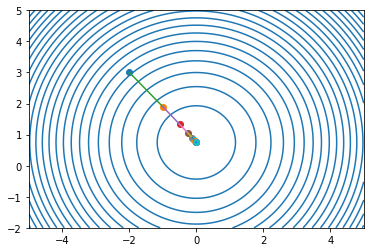

In [10]:
def plot_steps( startpt=[-1,4], alpha=.5, nsteps=10) :     # to draw contour plots and current value of theta
    fig, ax = plt.subplots()
    # setup the contour axis
    p0 = np.linspace(-5,5, 100)
    p1 = np.linspace(-2,5, 100)
    pa0, pa1 = np.meshgrid(p0, p1)

    # plot the Cost function J
    ax.contour(pa0,pa1,J(pa0,pa1,x_new,y_new,m=len(x)) , colors='C0', levels=[i for i in np.arange(0,80,.9)])

    # starting point
    #a0 = -1; a1 = 4
    a0 = startpt[0]; a1 = startpt[1]
    ax.plot(a0,a1, 'o')
    print(a0,a1)

    # do the gradient descent loop and plot the progress
    for i in range(nsteps):
        a0old, a1old = a0, a1
        a0,a1 = ap1(a0,a1, gJ=gradJ(a0,a1,x_new,y_new,m), alpha=alpha)
        print(a0,a1) # the updated parameters
        ax.plot(a0,a1,'o')
        ax.plot([a0old,a0],[a1old,a1], '-') # connect the dots
        
plot_steps( startpt=[-2,3], alpha=.5, nsteps=10)

In [15]:
def plot_graph(x, y, a0, a1):
    fig, ax = plt.subplots()
    ax.plot(x, y, 'o', label = "traning data")
    ax.plot(x, h(x_new, a0, a1), label = "h(x) = %.2f + %.2f * x" %(a0, a1))
    plt.legend()

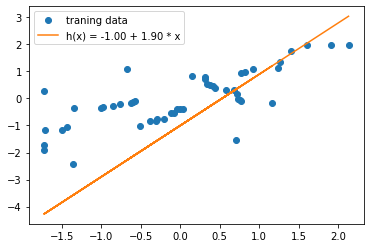

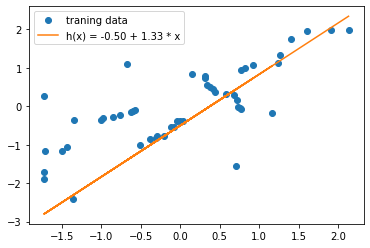

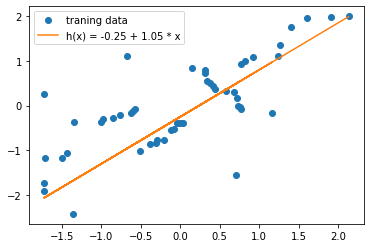

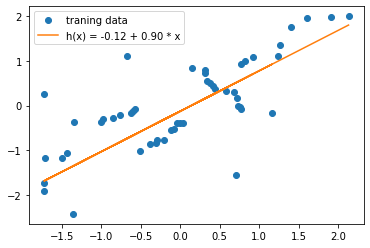

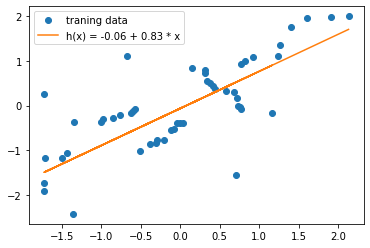

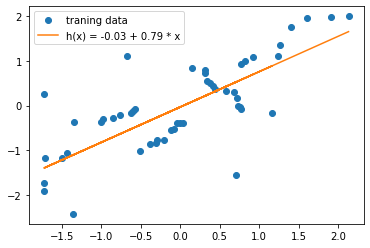

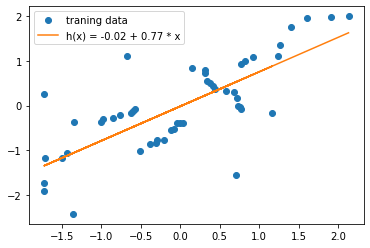

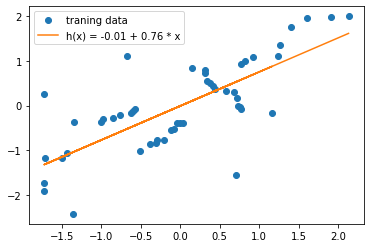

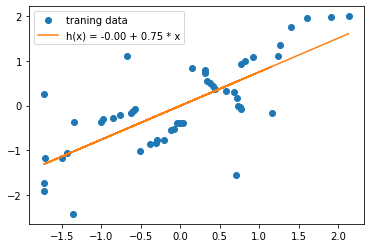

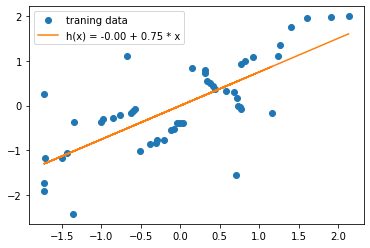

In [16]:
a0 = -2 
a1 = 3
for i in range (10) :
    a0, a1 = ap1(a0, a1, gJ = gradJ(a0, a1, x_new, y_new, m), alpha = 0.5)
    plot_graph(x_new, y_new, a0, a1)

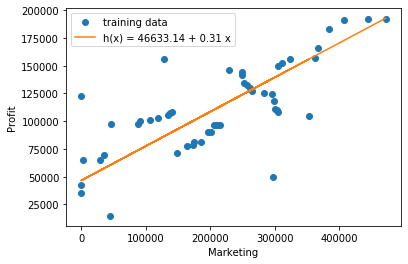

In [18]:
a0 = 0; a1 = 0.94
b1 = y_std/x_std * a1
b0 = y_std * a0 - b1*x_mean + y_mean

fig, ax = plt.subplots()
ax.plot(x,y, 'o', label='training data')
ax.plot(x, b0 + b1*x, label='h(x) = %.2f + %.2f x' %(b0, b1))
ax.set_xlabel('Marketing')
ax.set_ylabel('Profit')
plt.legend();

# PREDICTION OF PROFITS DEPENDING ON MARKETING 

In [20]:
def predict(x, a0, a1) :
    pre = y_std * (a0 + a1 * (x - x_mean)/x_std) + y_mean
    return pre

In [23]:
a0 = 0
a1 = 0.75


In [24]:
predict(200000 , a0 , a1)


109287.28276622297

In [25]:
predict(300000 , a0 , a1)


134006.84973257713

In [26]:
predict(350000 , a0 , a1)


146366.6332157542

In [27]:
predict(400000 , a0 , a1)


158726.4166989313

In [28]:
predict(150000 , a0 , a1)


96927.49928304588